In [1]:
import pandas as pd
import numpy as np

In [2]:
path='C:/Users/omkar/OneDrive/Desktop/drive/My drive/input/hmnist_28_28_RGB.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.tail()


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [5]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [6]:
print(len(train_set))

8012


In [7]:
print(len(test_set))

2003


In [8]:
df.label.unique()

array([1, 4, 0, 2, 6, 5, 3], dtype=int64)

In [9]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}


In [10]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


c:\users\omkar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

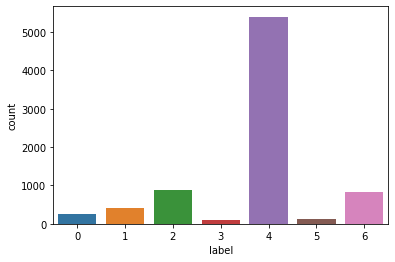

In [11]:
import seaborn as sns
sns.countplot(train_set['label'])

In [12]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

c:\users\omkar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

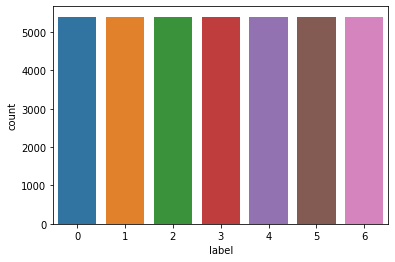

In [13]:
sns.countplot(y_train)

In [14]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  5401
Number of  basal cell carcinoma(Cancer) images:  5401
Number of  benign keratosis-like lesions(Non-Cancerous) images:  5401
Number of  dermatofibroma(Non-Cancerous) images:  5401
Number of  melanocytic nevi(Non-Cancerous) images:  5401
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  5401
Number of  melanoma(Cancer) images:  5401


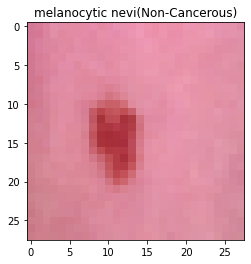

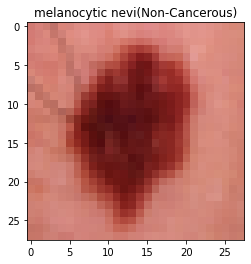

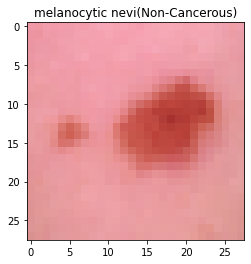

In [15]:
import matplotlib.pyplot as plt
import random
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [17]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          2

In [18]:
#Checkpoint
callback = tf.keras.callbacks.ModelCheckpoint('C:/Users/omkar/OneDrive/Desktop/drive/My drive/input/.ipynb_checkpoints/model-{epoch:3d}.hdf5', monitor='val_accuracy', mode='auto', verbose=0, save_best_only=True)


In [19]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

c:\users\omkar\appdata\local\programs\python\python37\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
237/237 [==============================] - 27s 99ms/step - loss: 1.3319 - accuracy: 0.5248 - val_loss: 2.6298 - val_accuracy: 0.0897
Epoch 2/50
237/237 [==============================] - 23s 95ms/step - loss: 0.4408 - accuracy: 0.8576 - val_loss: 1.8830 - val_accuracy: 0.3038
Epoch 3/50
237/237 [==============================] - 23s 98ms/step - loss: 0.2761 - accuracy: 0.9067 - val_loss: 1.1523 - val_accuracy: 0.5603
Epoch 4/50
237/237 [==============================] - 20s 86ms/step - loss: 0.2131 - accuracy: 0.9276 - val_loss: 1.3305 - val_accuracy: 0.4660
Epoch 5/50
237/237 [==============================] - 24s 100ms/step - loss: 0.1911 - accuracy: 0.9345 - val_loss: 1.3463 - val_accuracy: 0.4441
Epoch 6/50
237/237 [==============================] - 21s 90ms/step - loss: 0.1376 - accuracy: 0.9523 - val_loss: 0.7028 - val_accuracy: 0.6854
Epoch 7/50
237/237 [==============================] - 21s 89ms/step - loss: 0.1135 - accuracy: 0.9613 - val_loss: 1.1539 - val_accuracy

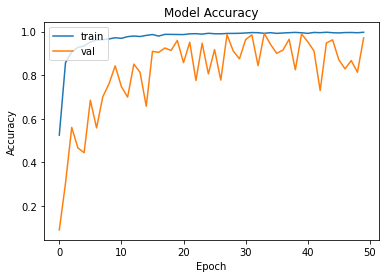

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

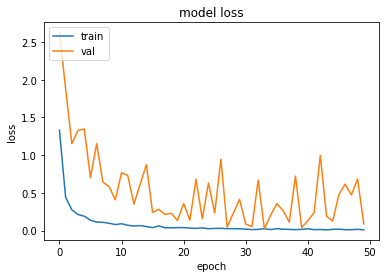

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
model.load_weights('C:/Users/omkar/OneDrive/Desktop/drive/My drive/input/.ipynb_checkpoints/model- 34.hdf5')

In [24]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.4308 - accuracy: 0.7289


In [25]:
import PIL
img = PIL.Image.open('C:/Users/omkar/OneDrive/Desktop/drive/My drive/input/TestImages/Malignant/ISIC_0033399.jpg')
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)

# print(result[0])

result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

melanoma(Cancer)
Confidence:  99.8236894607544 %
